In [1]:
# Data manipulation
import numpy as np
import pandas as pd
# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


#### Import Data

In [2]:
df = pd.read_csv('../raw_data/clean_data.csv', low_memory = False)

In [3]:
df.columns

Index(['name', 'club', 'nat', 'position', 'dob', 'age', 'height', 'weight',
       'wage', 'last trans. fee', 'value', 'agg', 'jum', 'pun', 'vis', 'l th',
       'lon', 'otb', 'tck', 'tec', 'tea', 'cmp', 'fre', 'ref', 'pos', 'pen',
       'pas', 'fla', 'ant', 'cro', 'mar', 'ldr', 'cor', 'cnt', 'det', 'dec',
       'hea', 'fir', 'com', 'acc', 'pac', 'aer', 'str', 'thr', 'han', 'ecc',
       'dri', 'bal', 'kic', 'sta', 'agi', 'wor', 'bra', 'cmd', 'fin', '1v1',
       'tro', 'centerback', 'fullback', 'goalkeeper', 'midfielder', 'striker',
       'winger', 'division_rating', 'nat_rating', 'club_rating', 'either_left',
       'either_right', 'left', 'right'],
      dtype='object')

In [4]:
df.set_index('name', inplace=True)
df.head(3)

,club,nat,position,dob,age,height,weight,wage,last trans. fee,value,...,midfielder,striker,winger,division_rating,nat_rating,club_rating,either_left,either_right,left,right
name,,,,,,,,,,,,,,,,,,,,,
Kevin De Bruyne,Man City,BEL,"M (RLC), AM (C)",28/6/1991 (29 years old),29.0,181.0,68.0,1091000.0,60000000.0,94000000.0,...,1,0,0,93.8,1793.71,2013.0,0,1,0,0
Harry Kane,Tottenham,ENG,"AM (C), ST (C)",28/7/1993 (27 years old),26.0,188.0,86.0,948000.0,0.0,88000000.0,...,0,1,0,93.8,1807.88,1837.0,1,0,0,0
Mohamed Salah,Liverpool,EGY,"AM (RL), ST (C)",15/6/1992 (28 years old),28.0,175.0,72.0,948000.0,37500000.0,84000000.0,...,0,0,1,93.8,1511.95,2042.0,0,0,1,0


In [5]:
columns_to_drop = ['club', 'nat', 'position', 'dob', 'wage', 'last trans. fee']
df.drop(columns=columns_to_drop, inplace=True)
df.head(3)

,age,height,weight,value,agg,jum,pun,vis,l th,lon,...,midfielder,striker,winger,division_rating,nat_rating,club_rating,either_left,either_right,left,right
name,,,,,,,,,,,,,,,,,,,,,
Kevin De Bruyne,29.0,181.0,68.0,94000000.0,12.0,10.0,1.0,20.0,8.0,16.0,...,1,0,0,93.8,1793.71,2013.0,0,1,0,0
Harry Kane,26.0,188.0,86.0,88000000.0,11.0,13.0,2.0,18.0,6.0,16.0,...,0,1,0,93.8,1807.88,1837.0,1,0,0,0
Mohamed Salah,28.0,175.0,72.0,84000000.0,10.0,8.0,2.0,17.0,6.0,13.0,...,0,0,1,93.8,1511.95,2042.0,0,0,1,0


#### Creating X and y dataset

In [6]:
# Assuming df is your DataFrame
columns_to_drop_for_x = ['value']

# Create a new Series y from the 'value' column before dropping it
y = df['value'].copy()

# Drop the specified columns in place
df.drop(columns=columns_to_drop_for_x, inplace=True)

X = df

In [7]:
X.columns

Index(['age', 'height', 'weight', 'agg', 'jum', 'pun', 'vis', 'l th', 'lon',
       'otb', 'tck', 'tec', 'tea', 'cmp', 'fre', 'ref', 'pos', 'pen', 'pas',
       'fla', 'ant', 'cro', 'mar', 'ldr', 'cor', 'cnt', 'det', 'dec', 'hea',
       'fir', 'com', 'acc', 'pac', 'aer', 'str', 'thr', 'han', 'ecc', 'dri',
       'bal', 'kic', 'sta', 'agi', 'wor', 'bra', 'cmd', 'fin', '1v1', 'tro',
       'centerback', 'fullback', 'goalkeeper', 'midfielder', 'striker',
       'winger', 'division_rating', 'nat_rating', 'club_rating', 'either_left',
       'either_right', 'left', 'right'],
      dtype='object')

#### Distribution of the different variables 

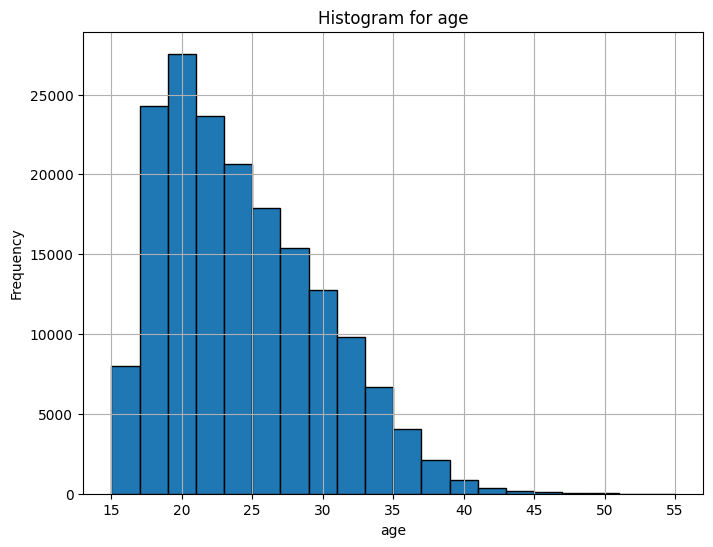

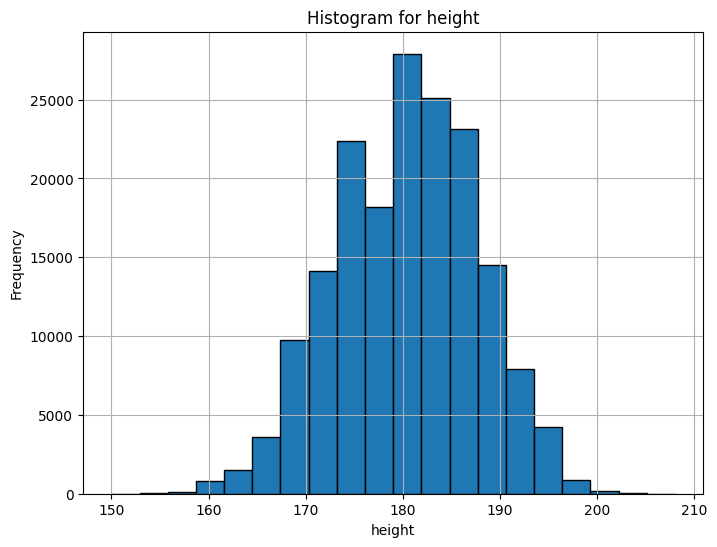

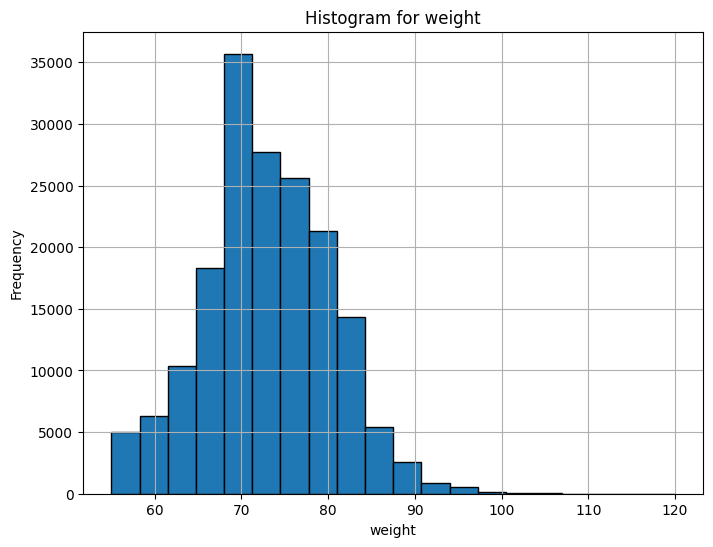

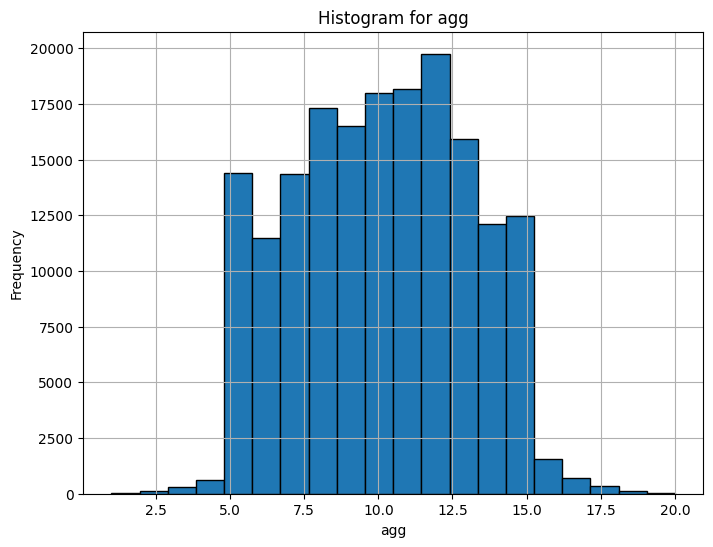

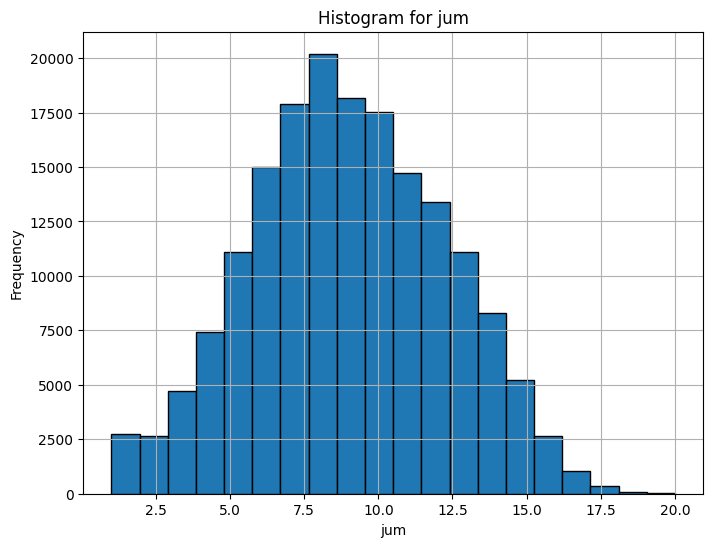

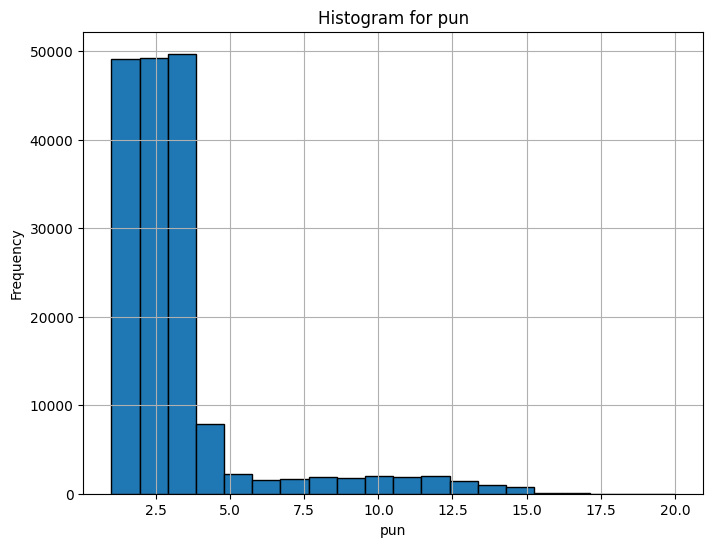

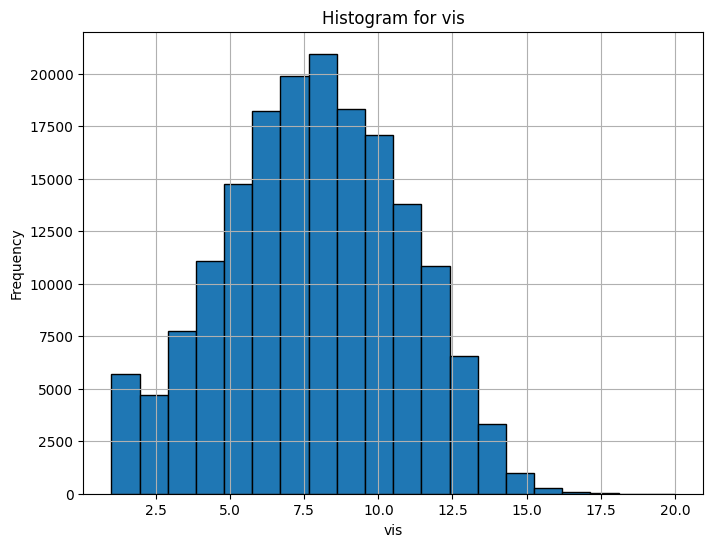

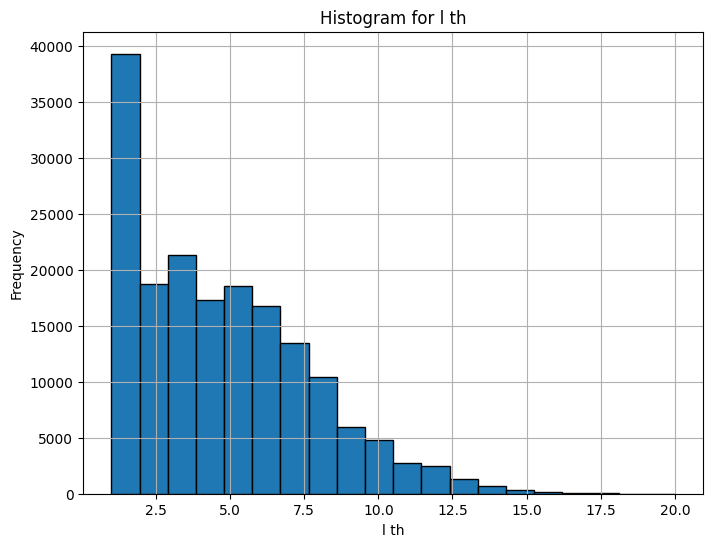

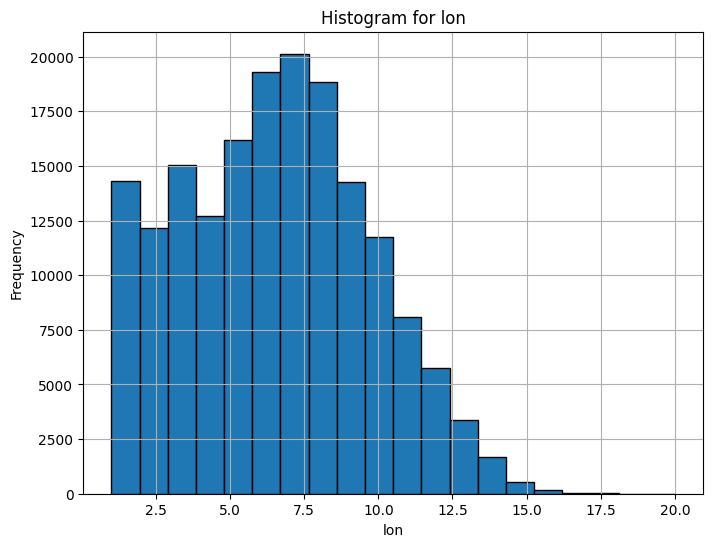

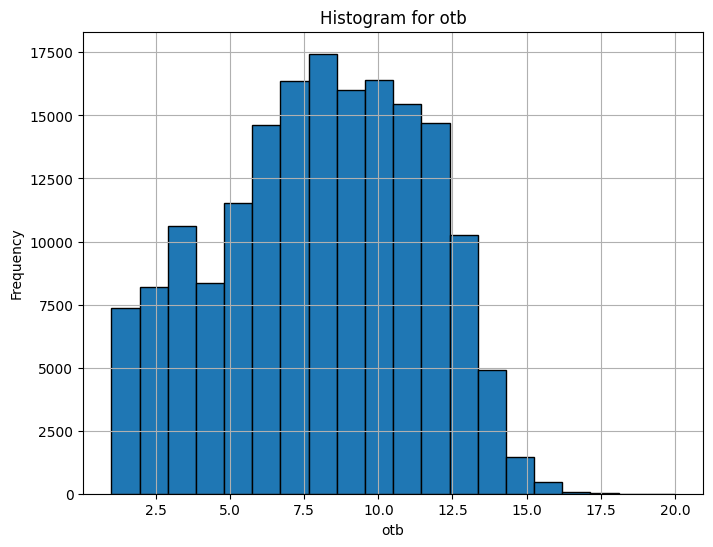

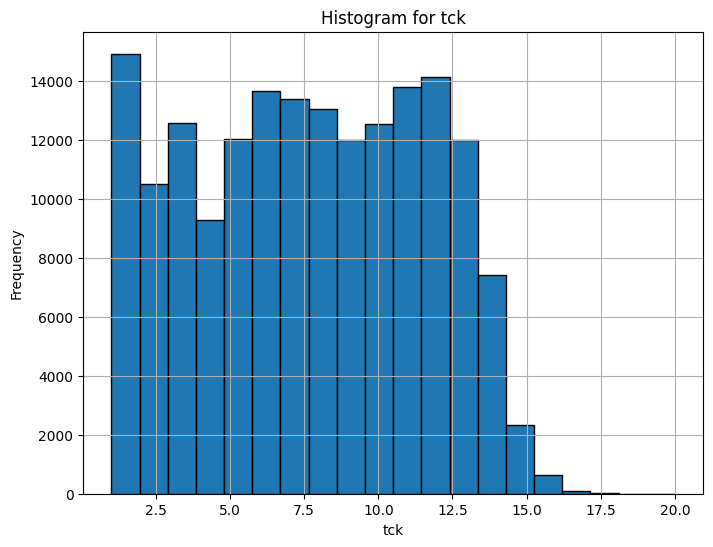

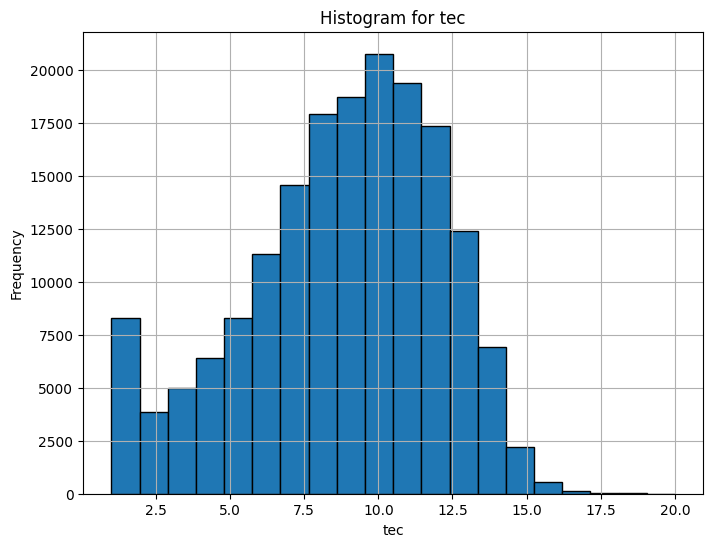

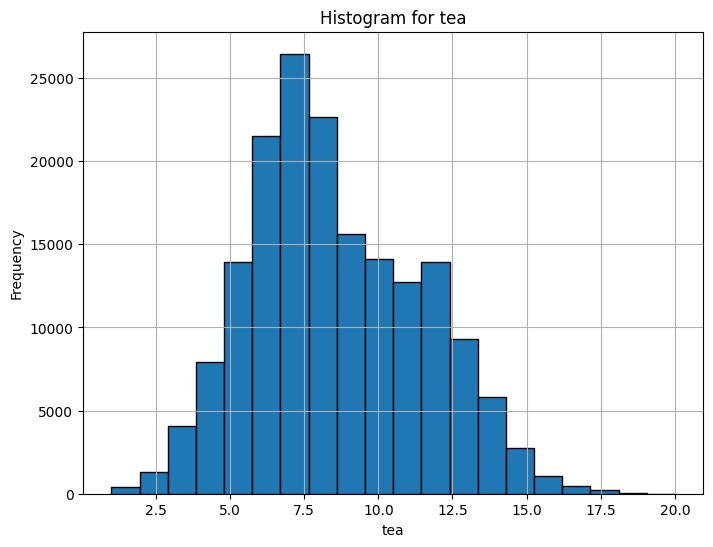

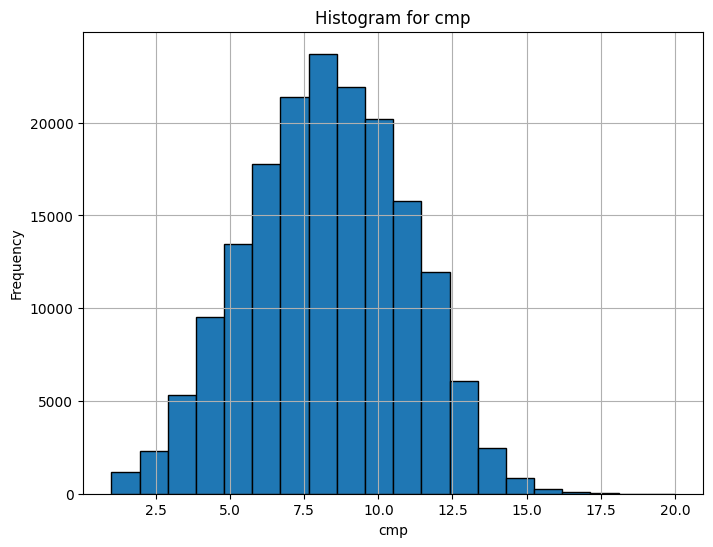

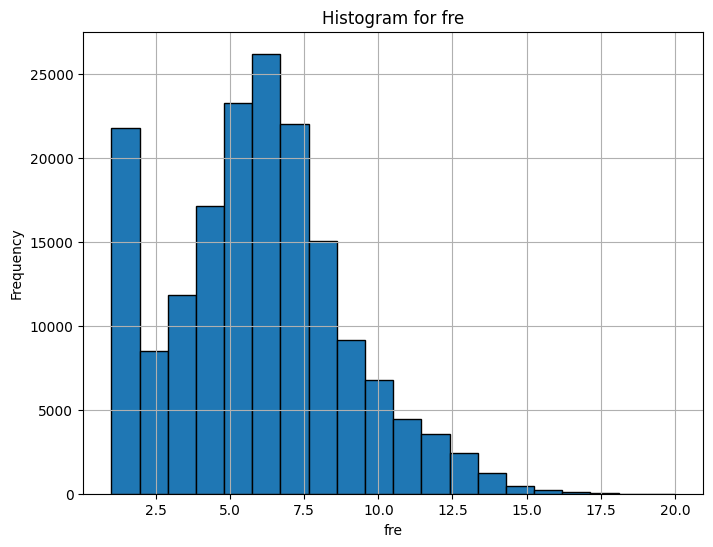

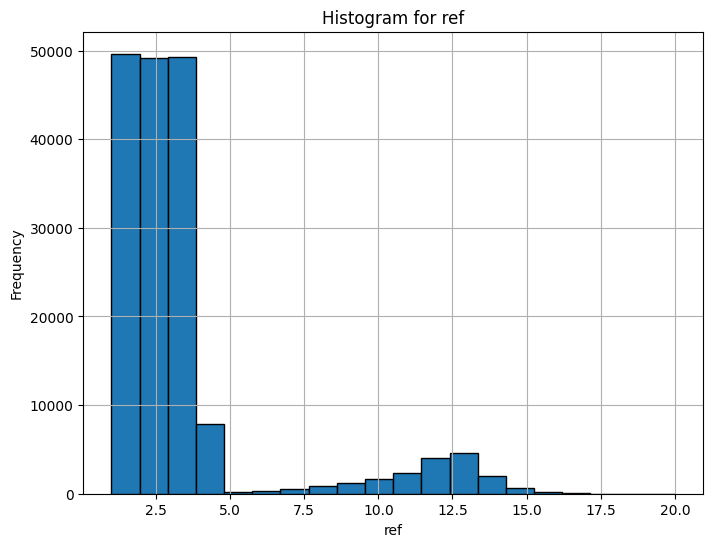

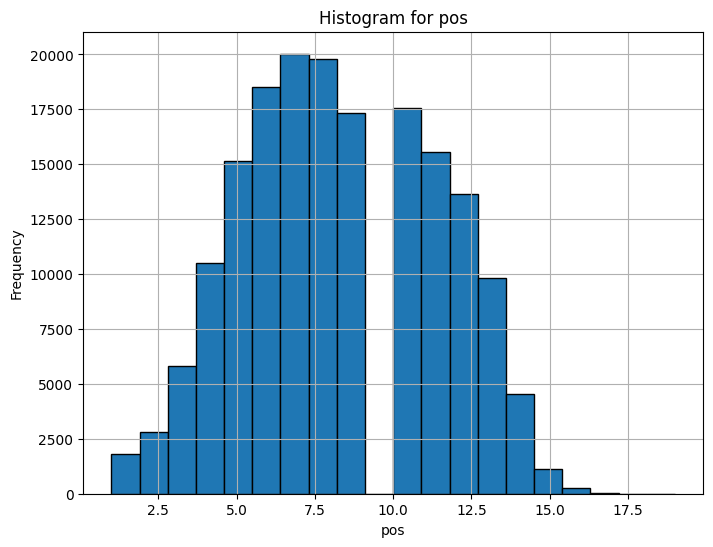

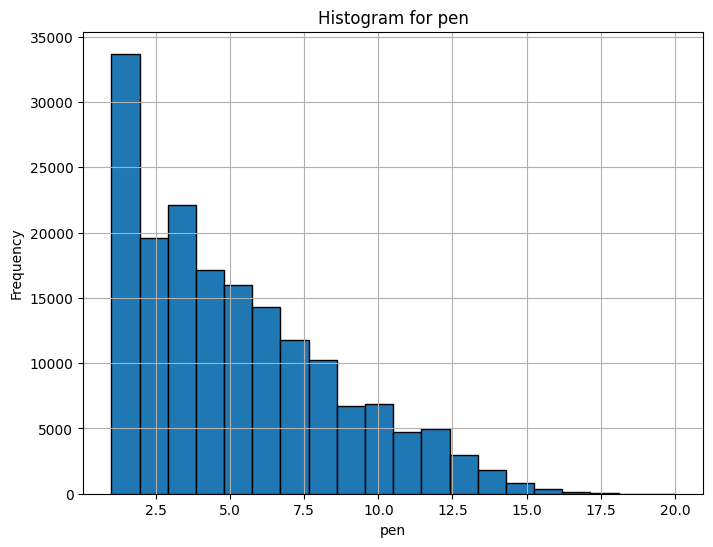

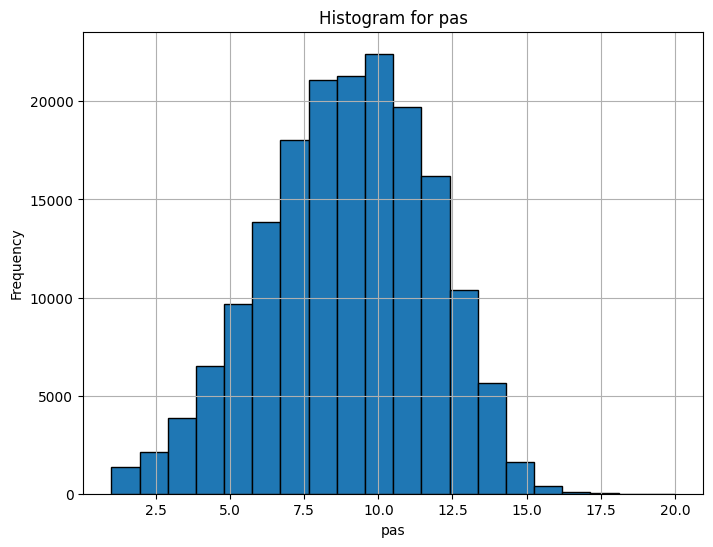

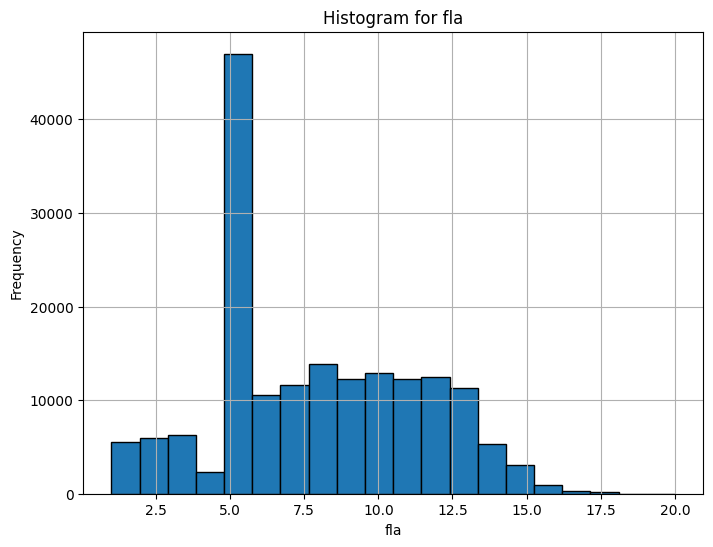

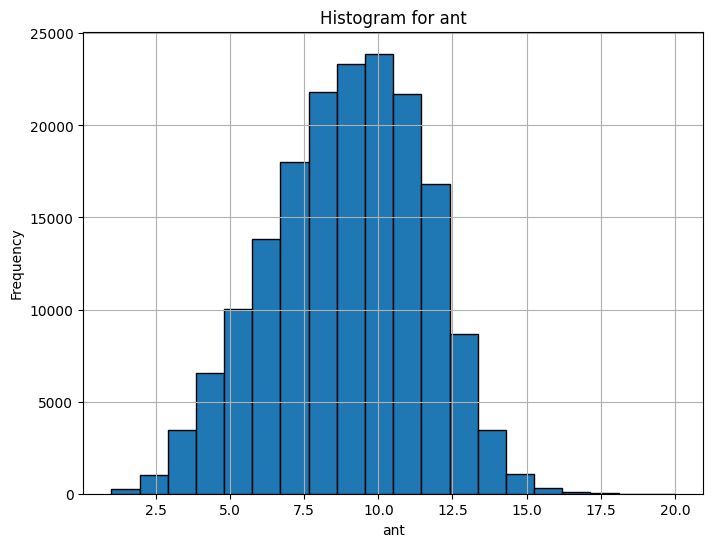

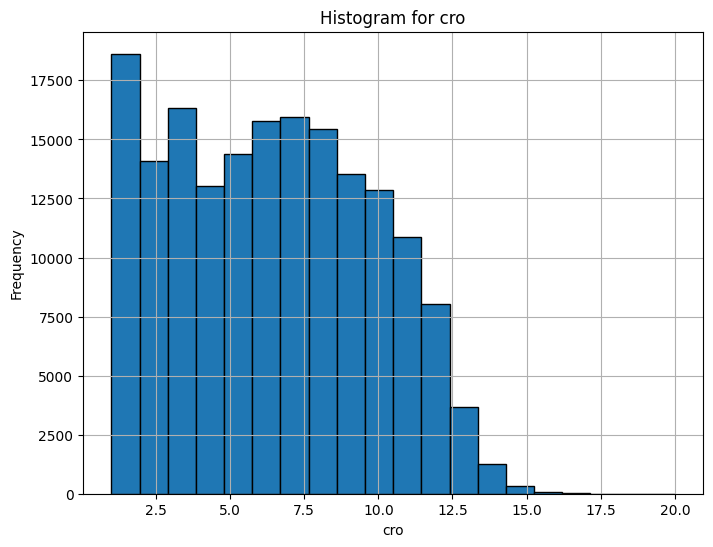

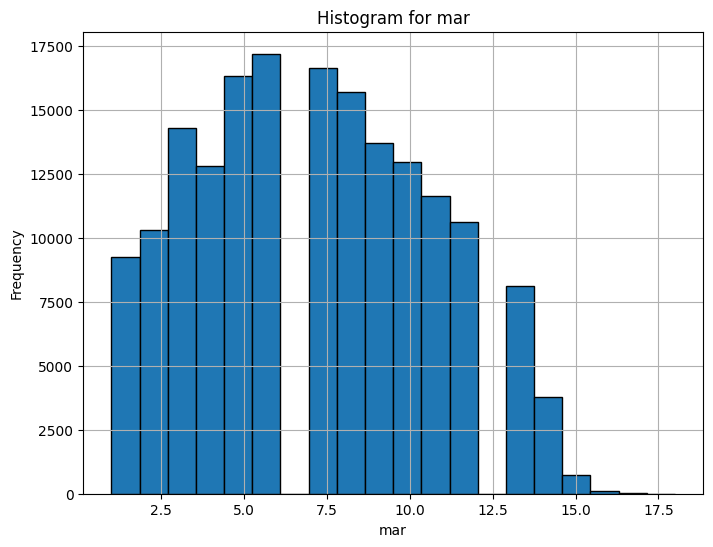

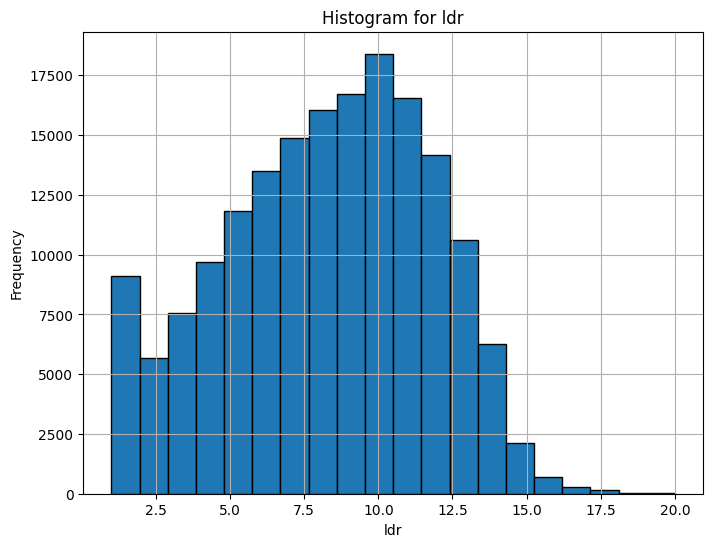

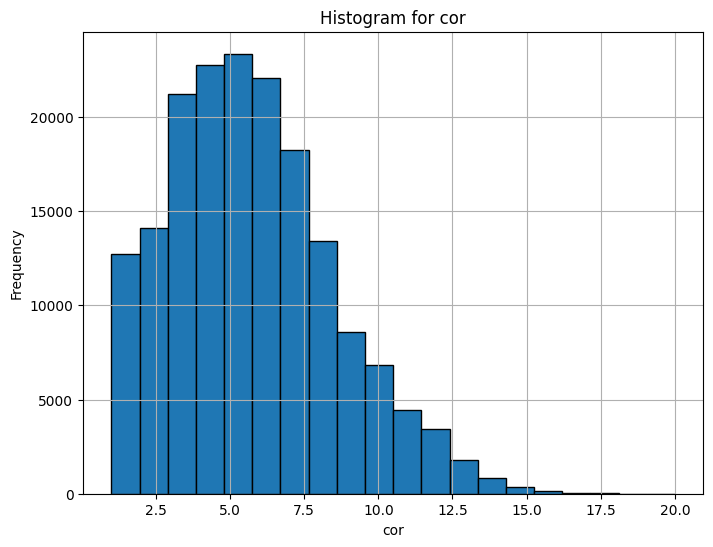

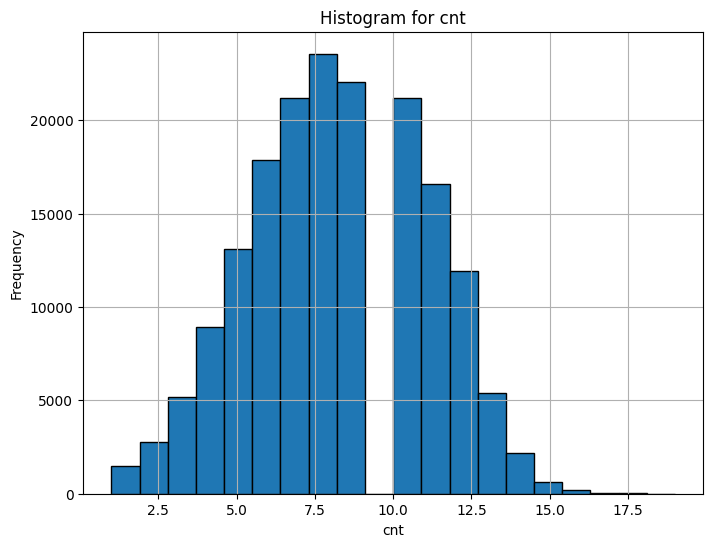

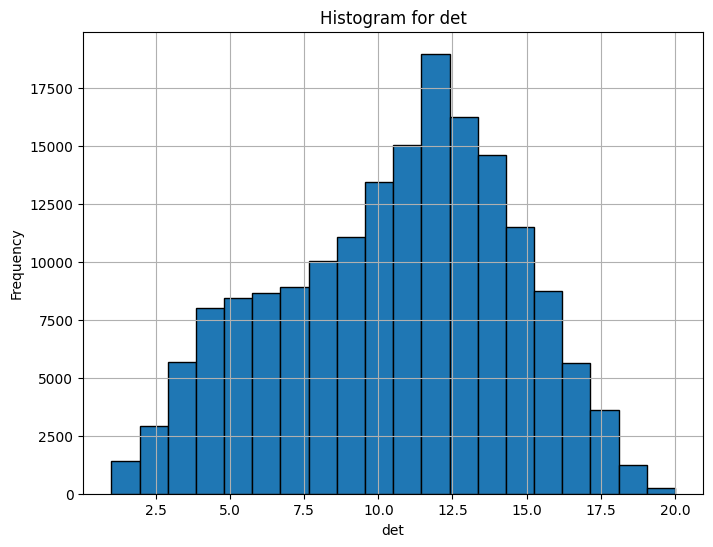

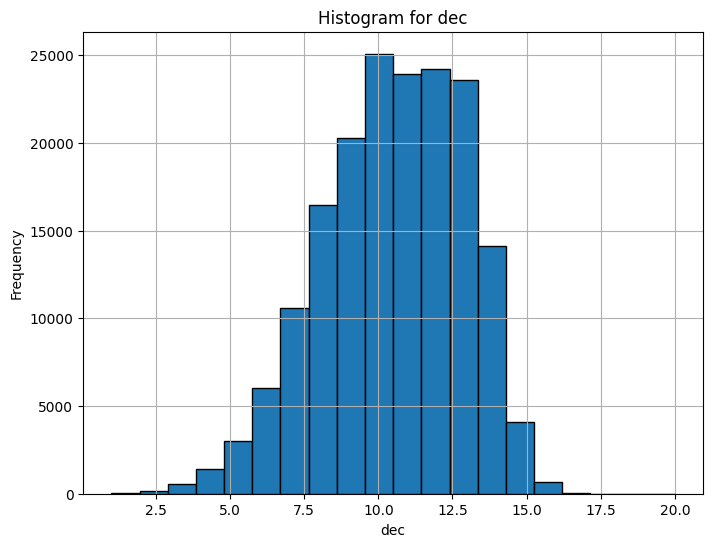

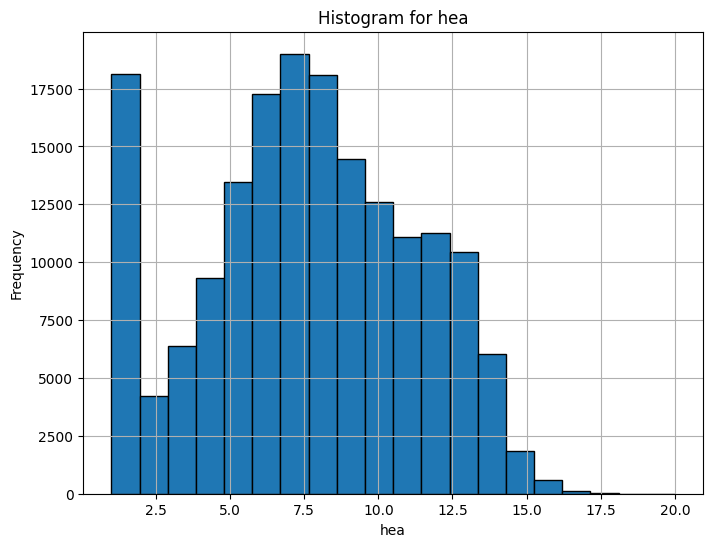

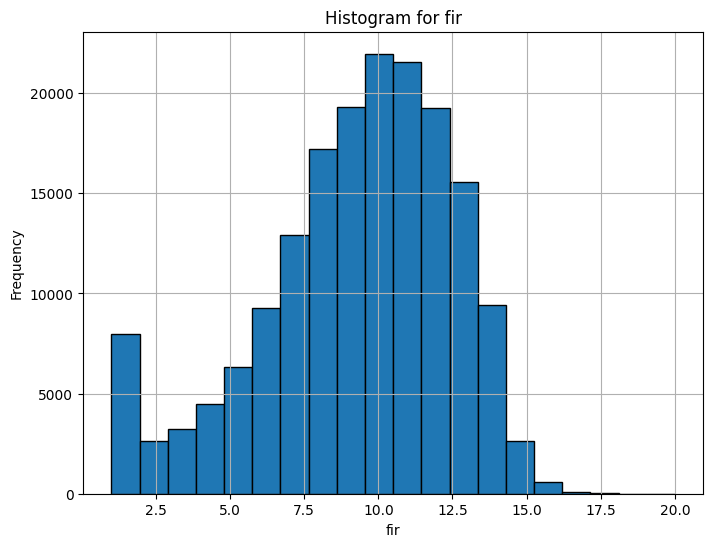

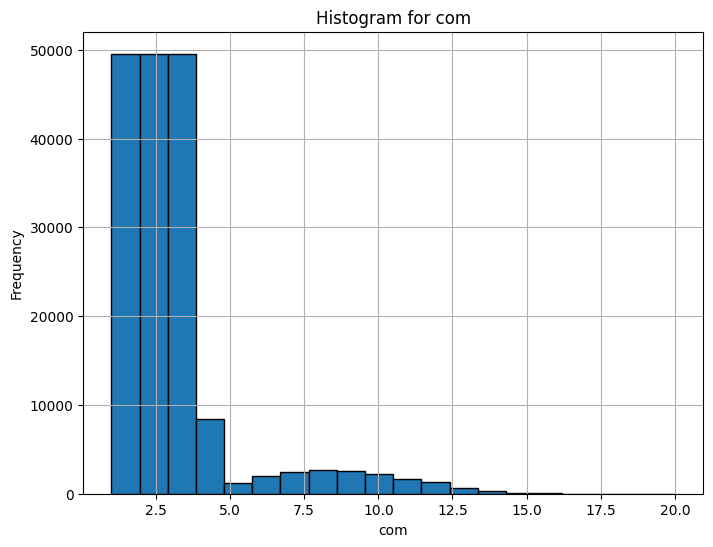

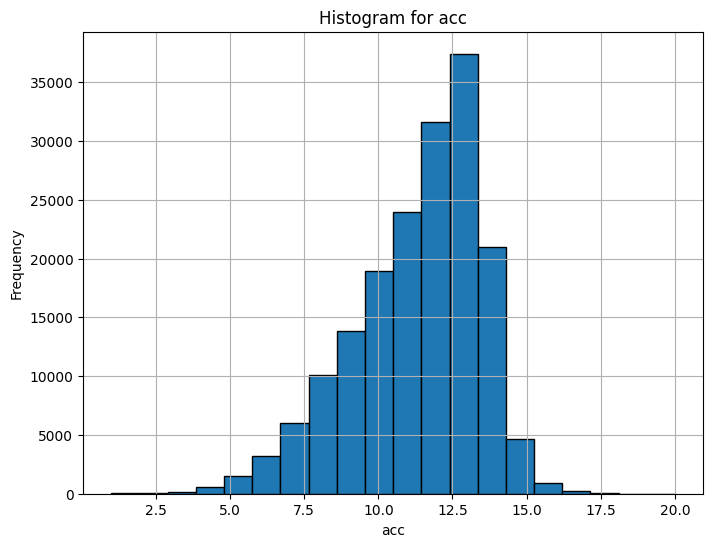

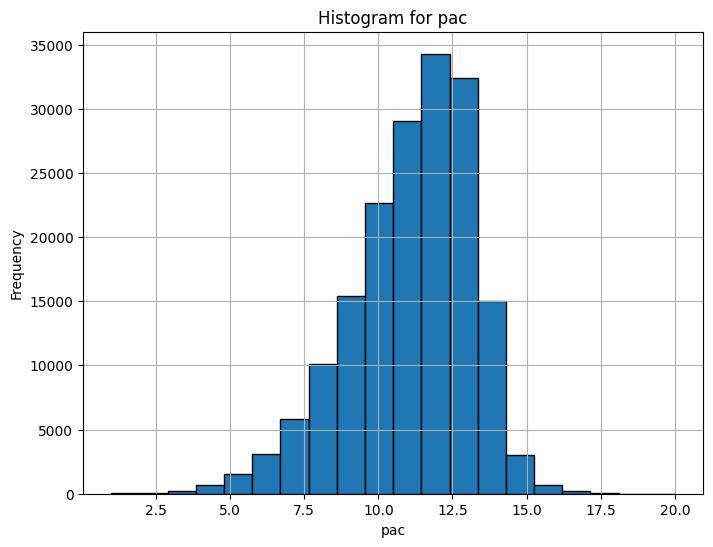

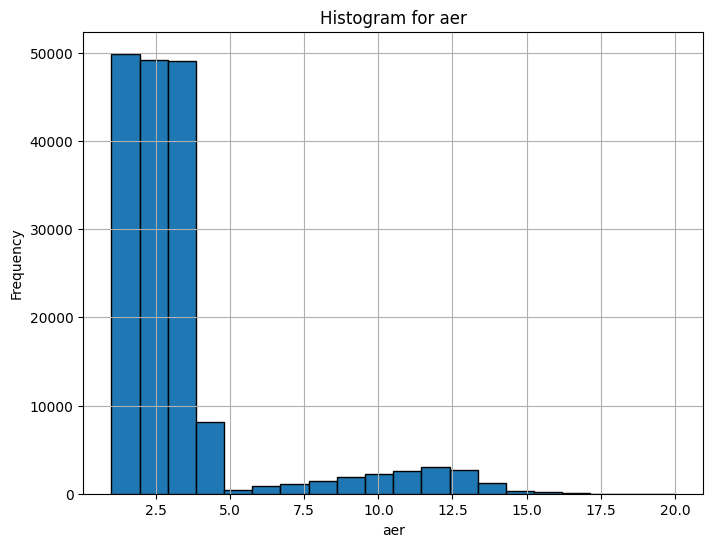

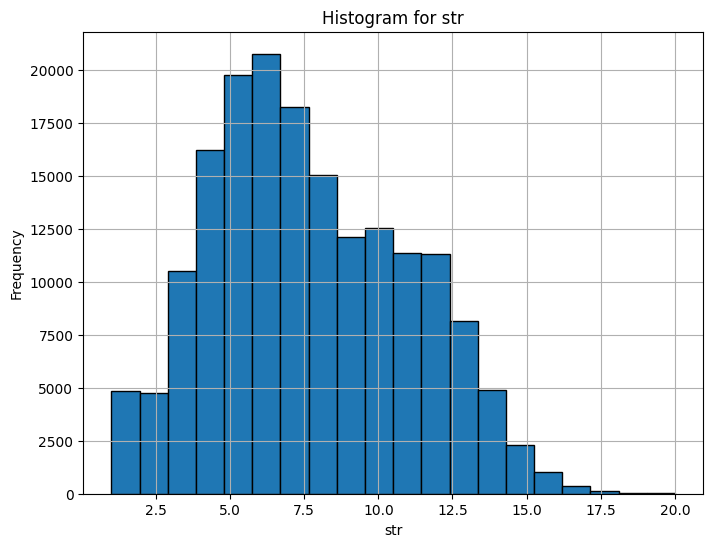

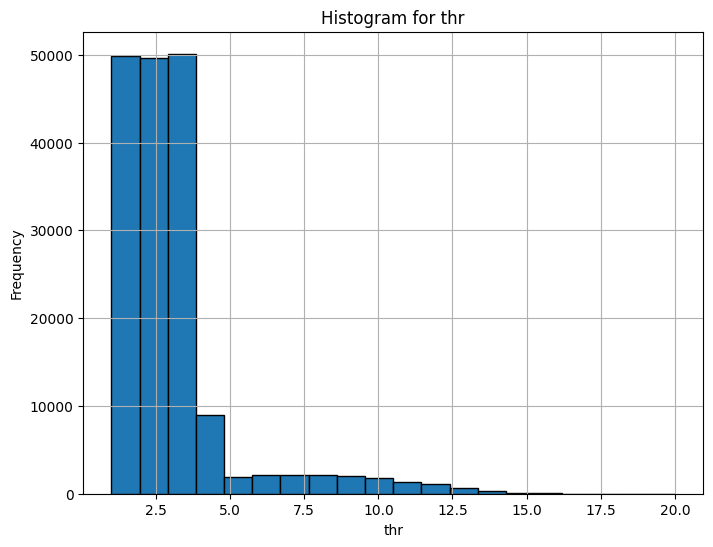

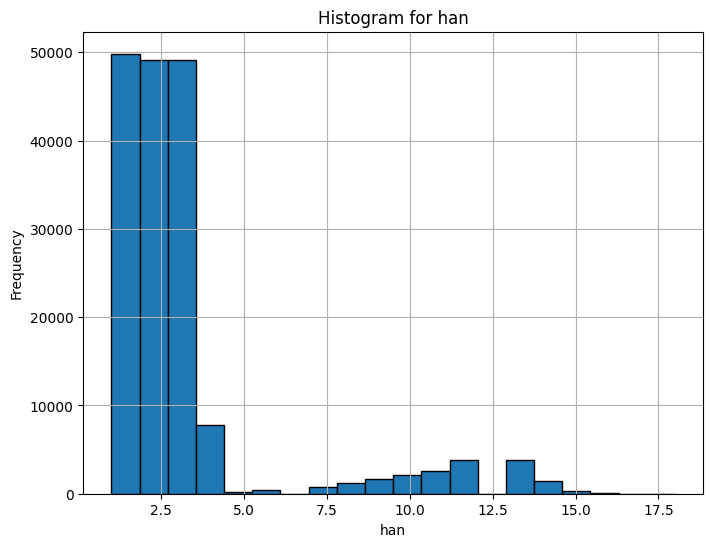

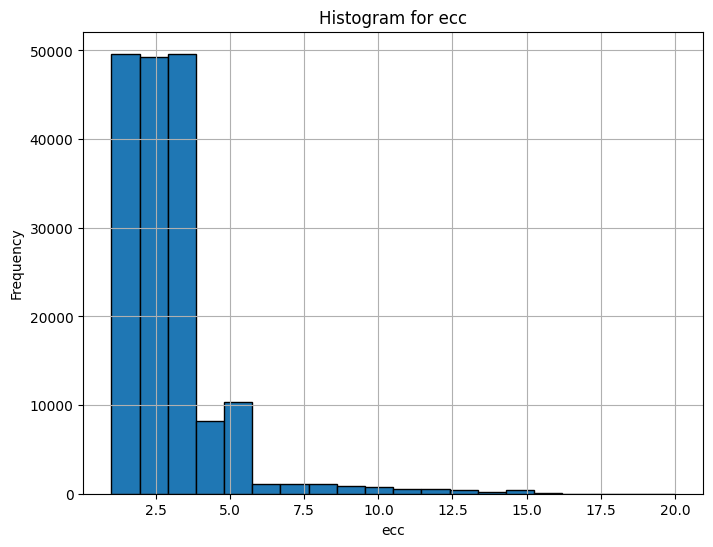

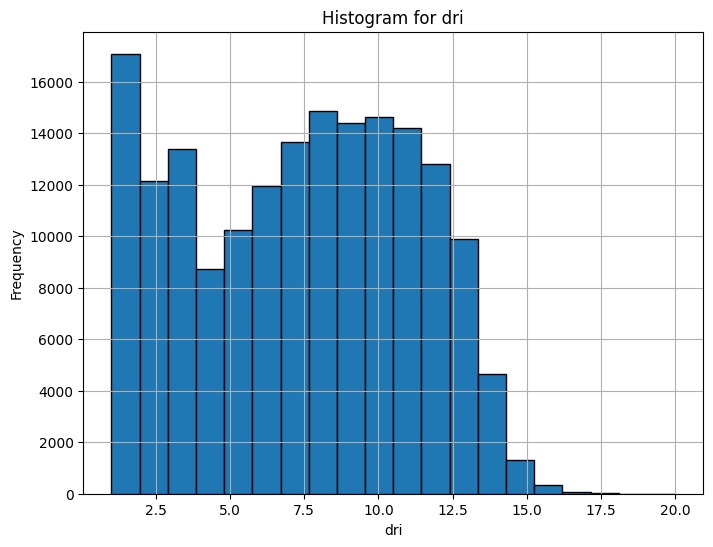

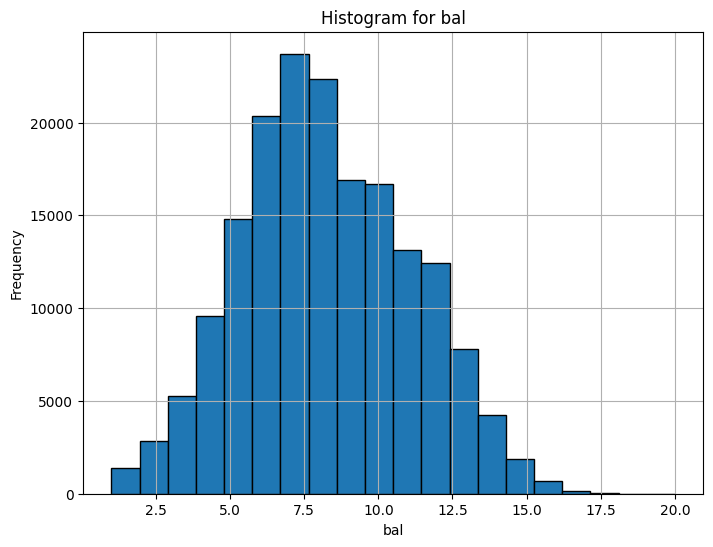

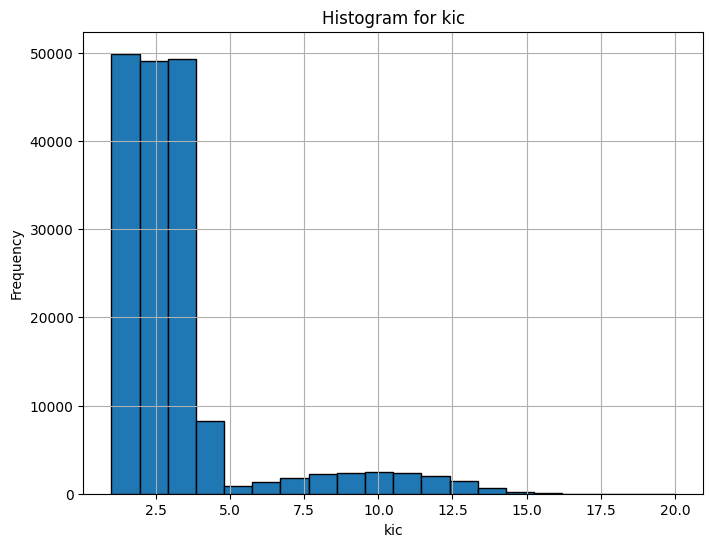

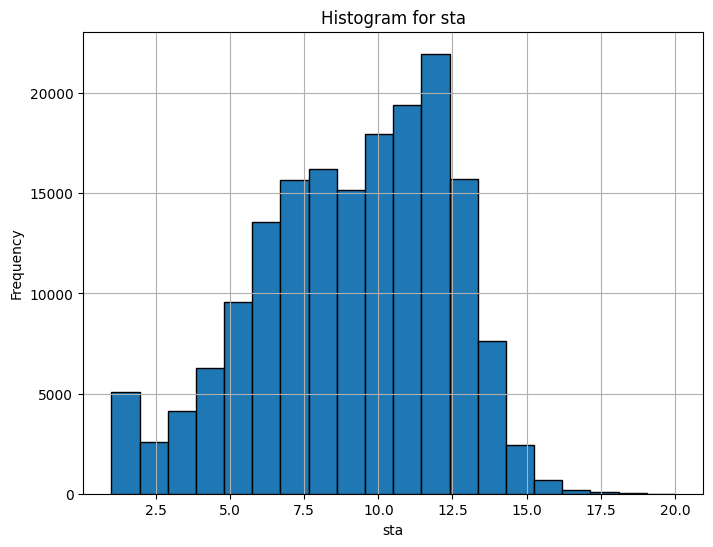

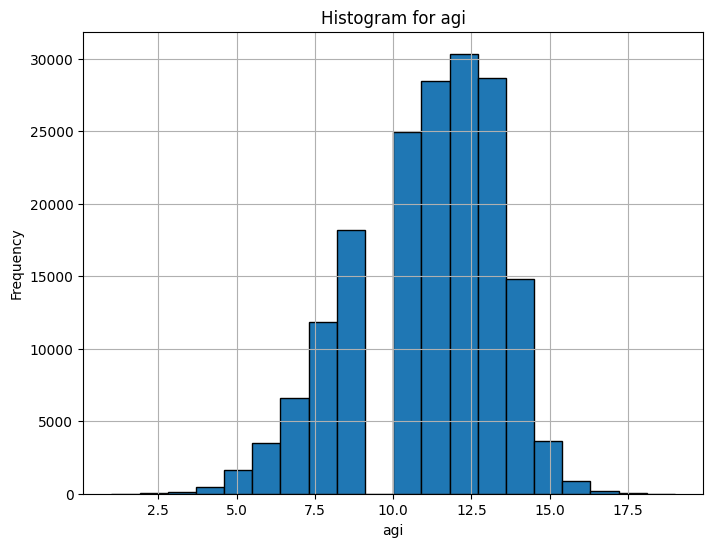

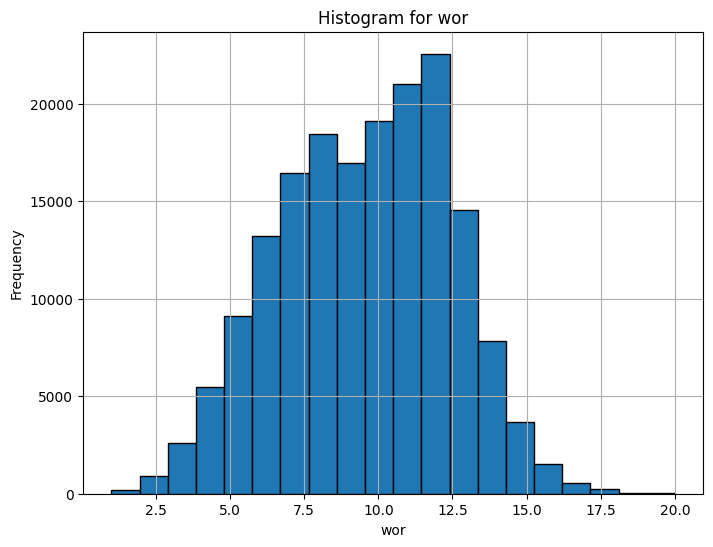

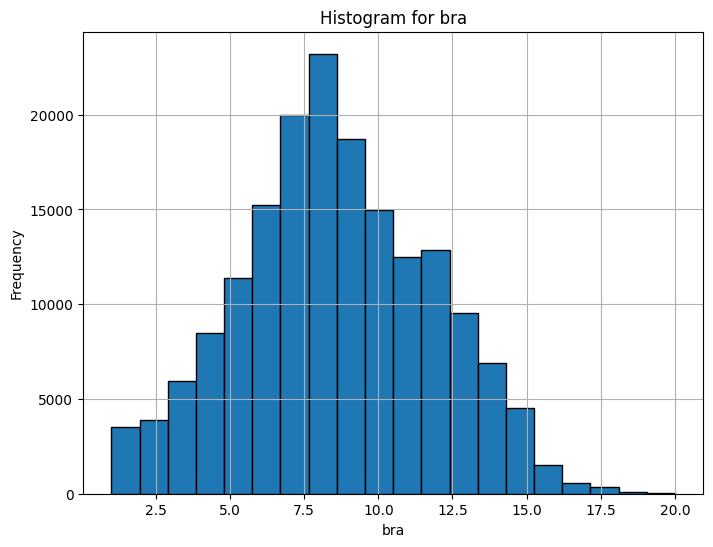

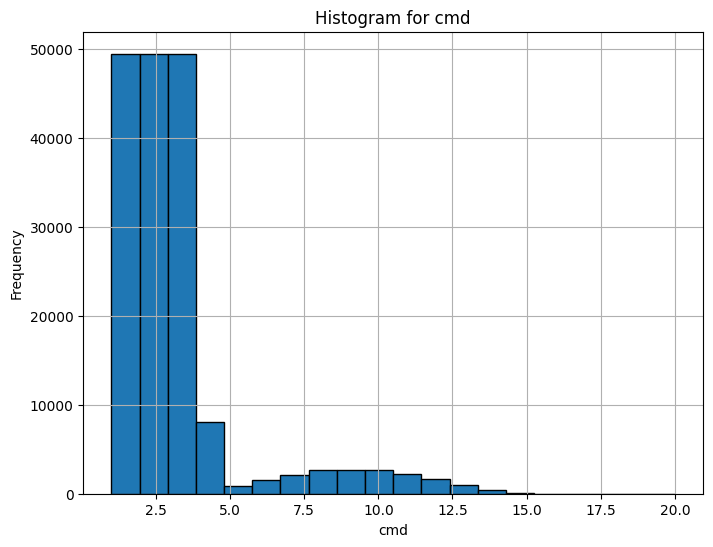

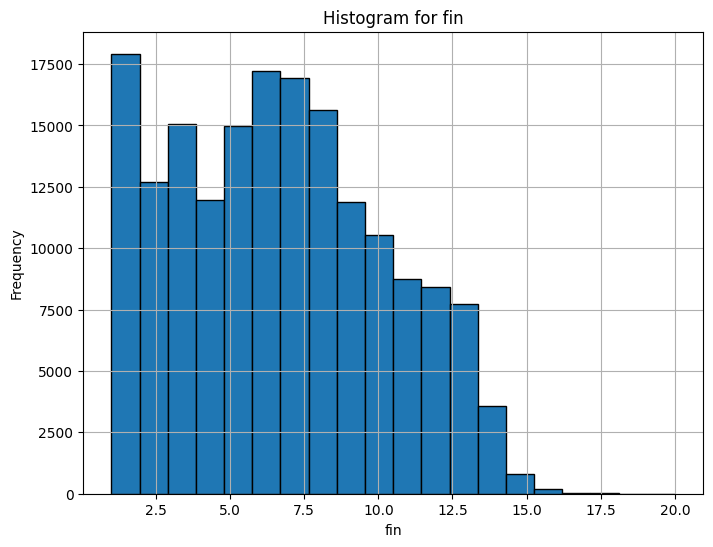

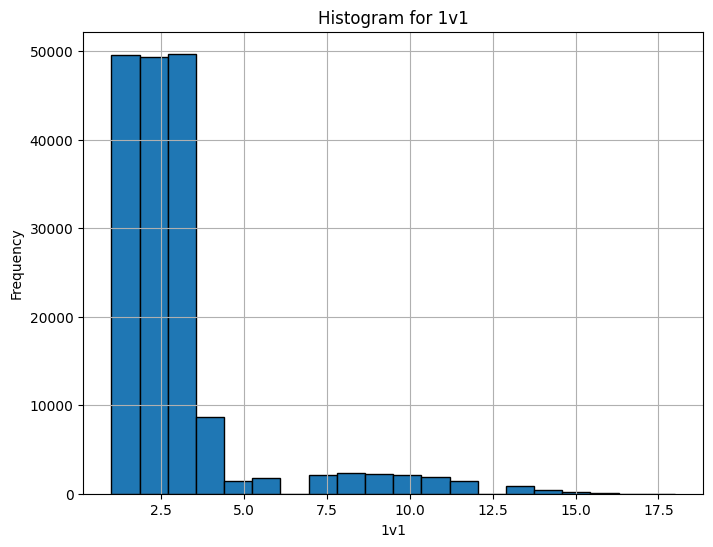

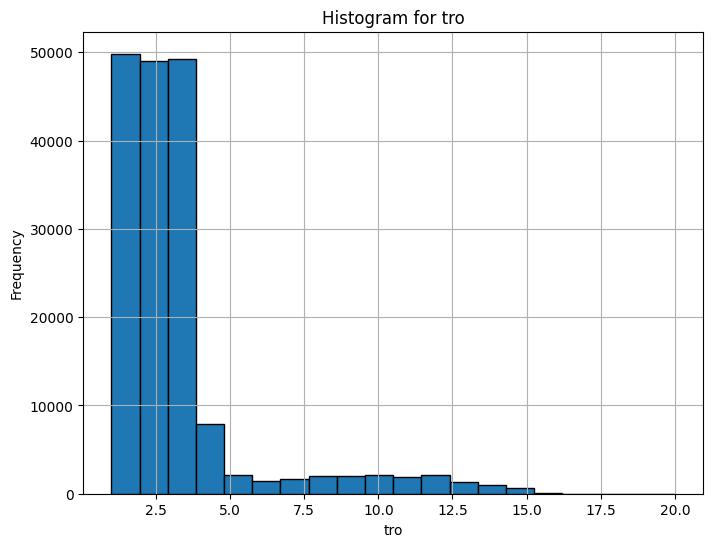

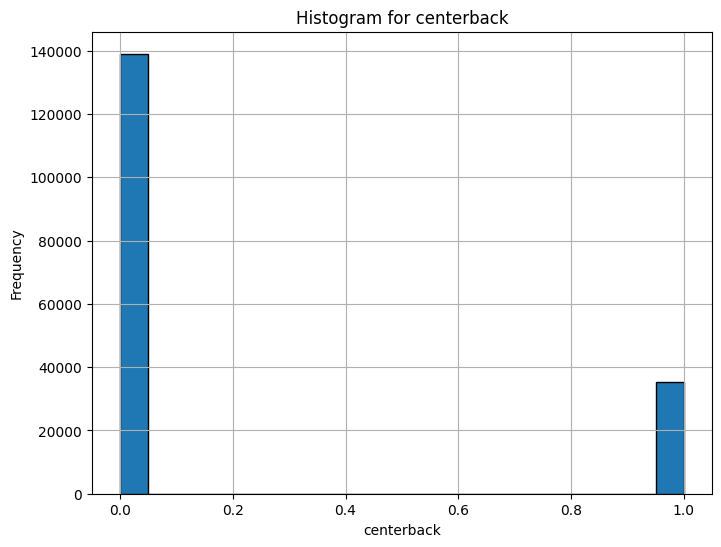

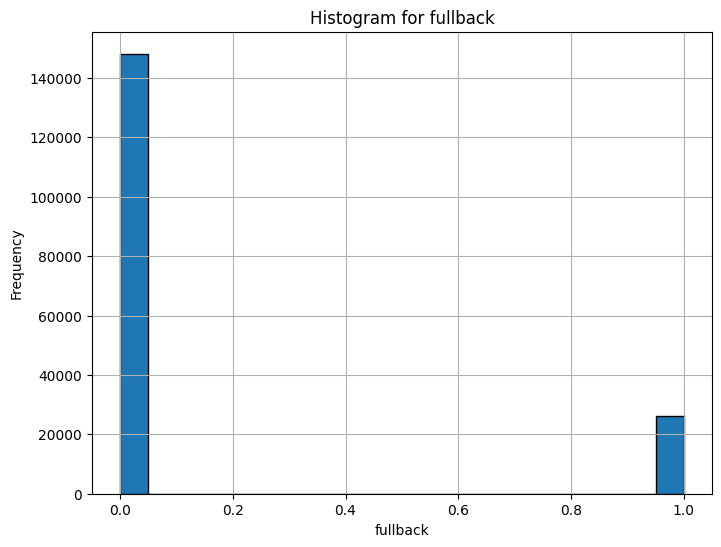

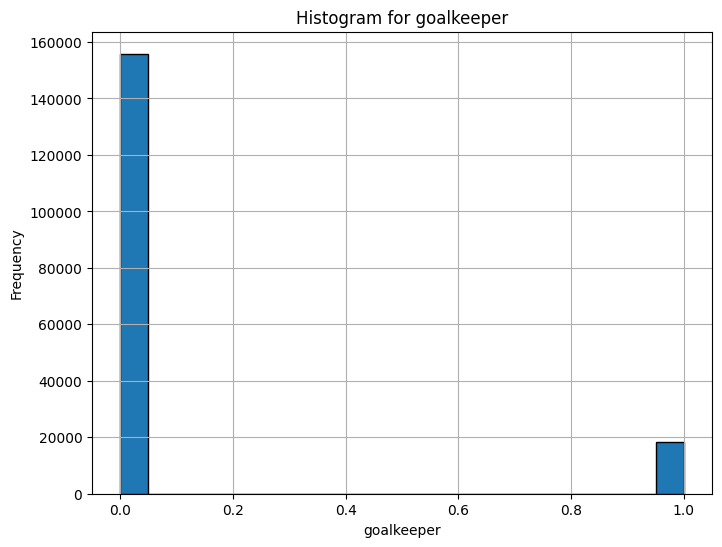

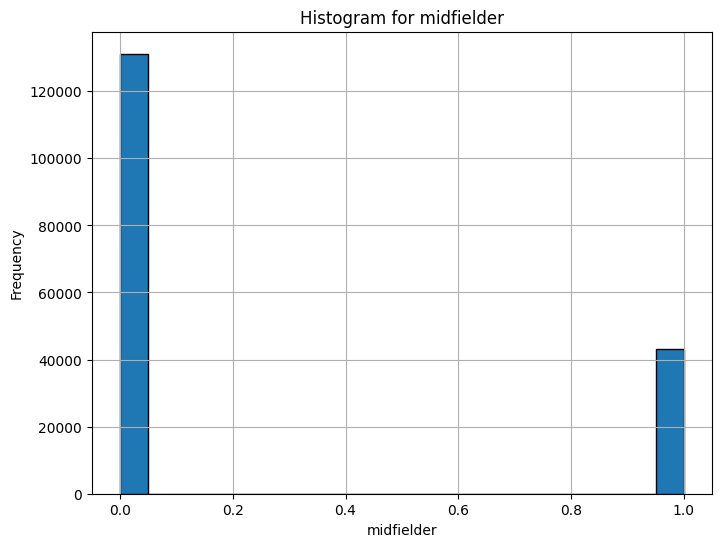

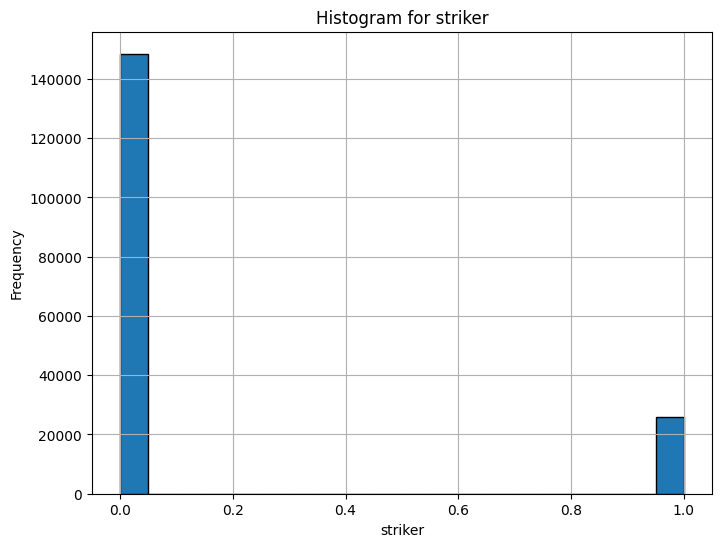

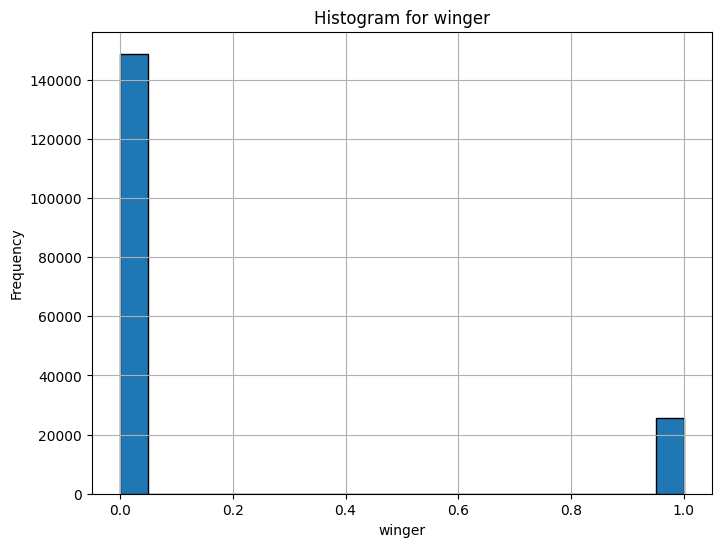

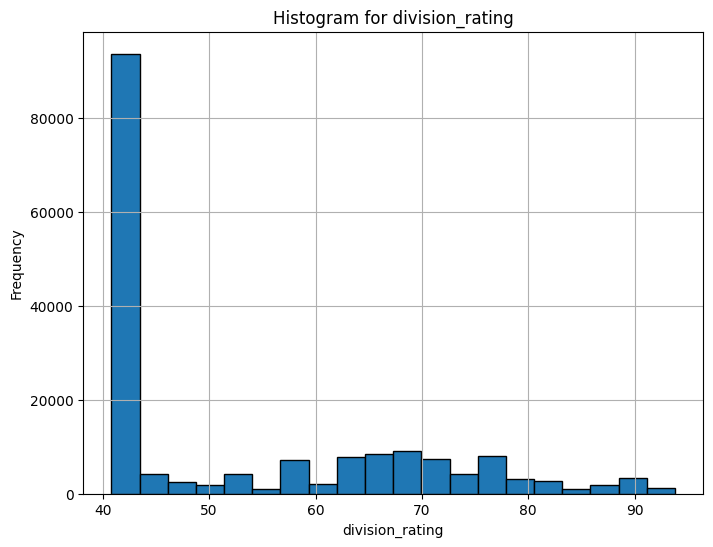

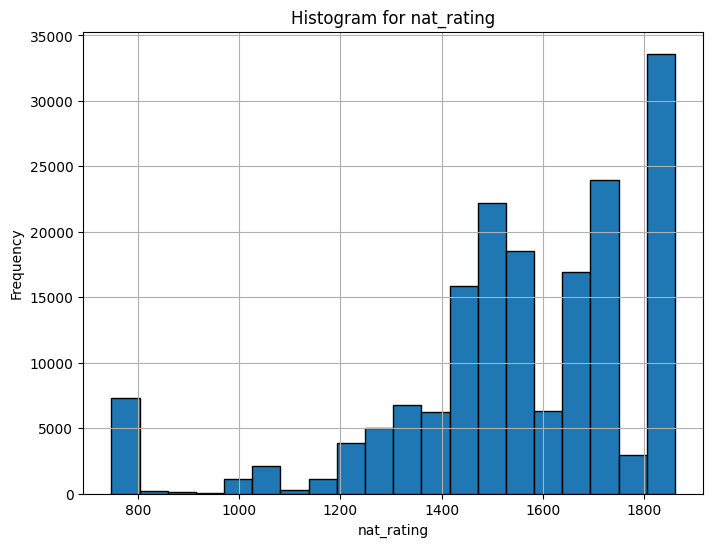

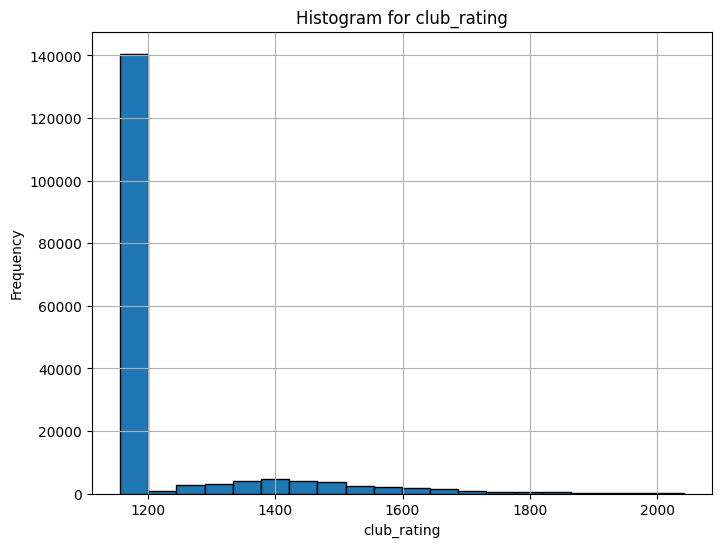

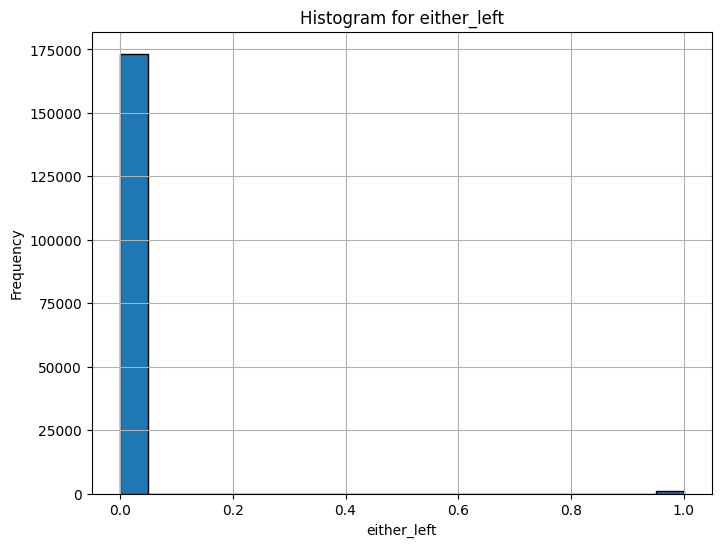

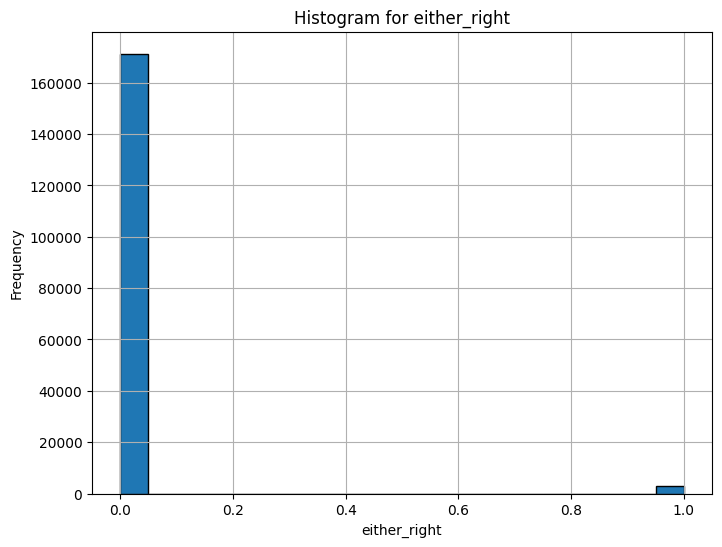

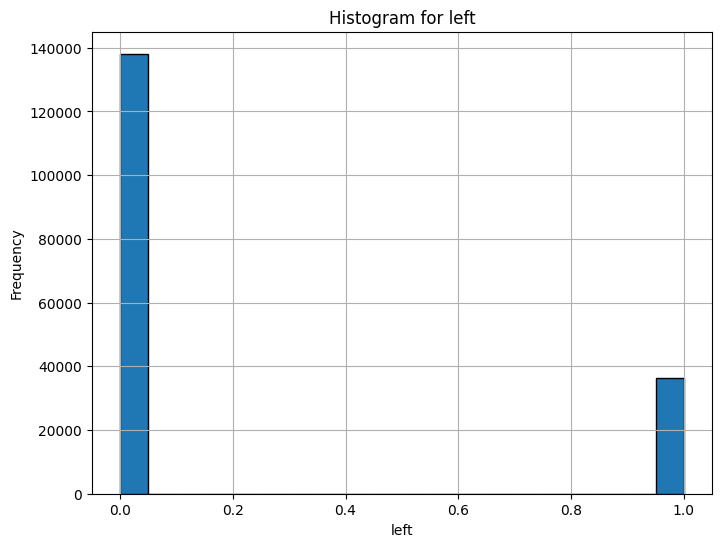

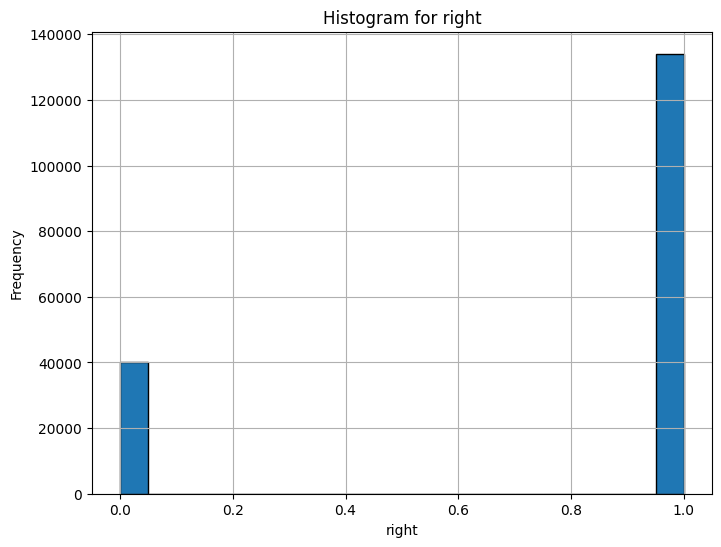

In [8]:

# Assuming X is your DataFrame
columns_to_plot = ['age', 'height', 'weight', 'agg', 'jum', 'pun', 'vis', 'l th', 'lon',
                   'otb', 'tck', 'tec', 'tea', 'cmp', 'fre', 'ref', 'pos', 'pen',
                   'pas', 'fla', 'ant', 'cro', 'mar', 'ldr', 'cor', 'cnt', 'det',
                   'dec', 'hea', 'fir', 'com', 'acc', 'pac', 'aer', 'str', 'thr',
                   'han', 'ecc', 'dri', 'bal', 'kic', 'sta', 'agi', 'wor', 'bra',
                   'cmd', 'fin', '1v1', 'tro', 'centerback', 'fullback', 'goalkeeper',
                   'midfielder', 'striker', 'winger', 'division_rating', 'nat_rating',
                   'club_rating', 'either_left', 'either_right', 'left', 'right']

# Plot individual histograms for each column
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.hist(X[column], bins=20, edgecolor='black')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


#### Boxplots for outliers

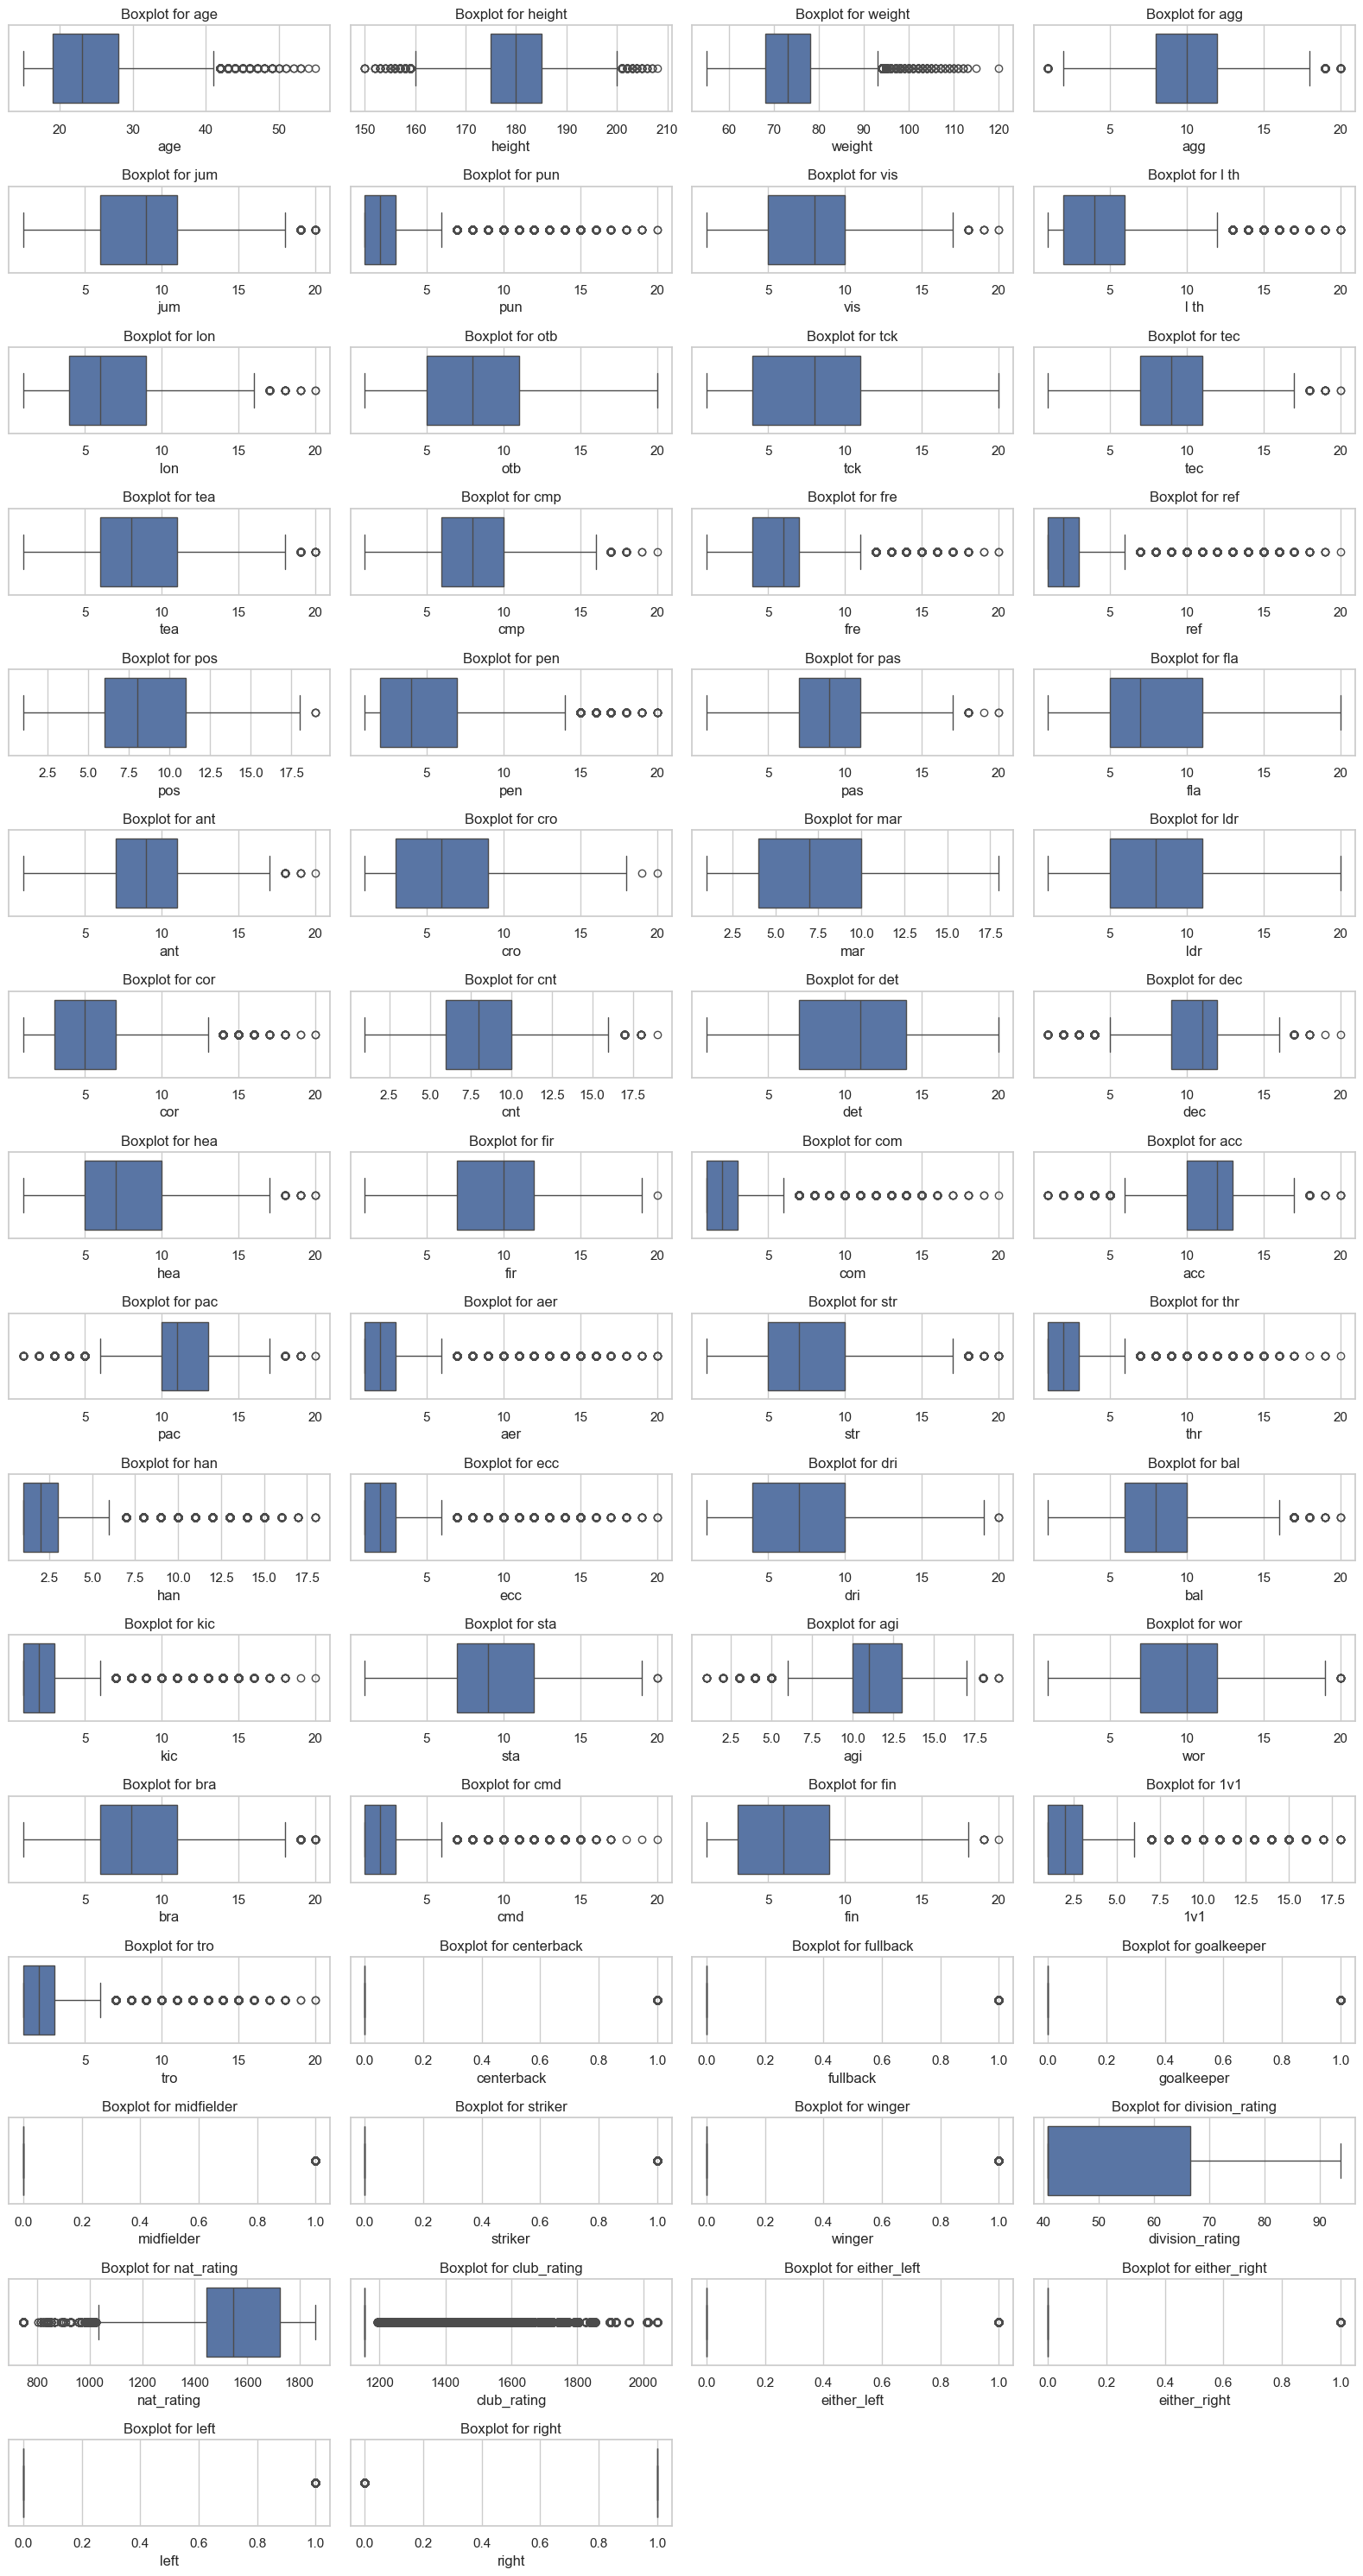

In [9]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Create box plots for each column with a larger layout
plt.figure(figsize=(16, 30))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(16, 4, i)
    sns.boxplot(x=X[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

#### Creating a pipeline


##### Split data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((139459, 62), (34865, 62), (139459,), (34865,))

##### Pipeline creation

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [12]:
preprocessor = ColumnTransformer([
    ('robust_scaler', RobustScaler(), ['age', 'height', 'weight', 'agg', 'jum', 'pun', 'vis', 'l th', 'lon',
                   'otb', 'tck', 'tec', 'tea', 'cmp', 'fre', 'ref', 'pos', 'pen',
                   'pas', 'fla', 'ant', 'cro', 'mar', 'ldr', 'cor', 'cnt', 'det',
                   'dec', 'hea', 'fir', 'com', 'acc', 'pac', 'aer', 'str', 'thr',
                   'han', 'ecc', 'dri', 'bal', 'kic', 'sta', 'agi', 'wor', 'bra',
                   'cmd', 'fin', '1v1', 'tro']),
    ],
    remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('robust_scaler', RobustScaler(),
                                 ['age', 'height', 'weight', 'agg', 'jum',
                                  'pun', 'vis', 'l th', 'lon', 'otb', 'tck',
                                  'tec', 'tea', 'cmp', 'fre', 'ref', 'pos',
                                  'pen', 'pas', 'fla', 'ant', 'cro', 'mar',
                                  'ldr', 'cor', 'cnt', 'det', 'dec', 'hea',
                                  'fir', ...])])

In [13]:
pipeline = make_pipeline(preprocessor, SVR(kernel='rbf'))
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['age', 'height', 'weight',
                                                   'agg', 'jum', 'pun', 'vis',
                                                   'l th', 'lon', 'otb', 'tck',
                                                   'tec', 'tea', 'cmp', 'fre',
                                                   'ref', 'pos', 'pen', 'pas',
                                                   'fla', 'ant', 'cro', 'mar',
                                                   'ldr', 'cor', 'cnt', 'det',
                                                   'dec', 'hea', 'fir', ...])])),
                ('svr', SVR())])

In [ ]:
# Train Pipeline
pipeline.fit(X_train,y_train)

# Make predictions
pipeline.predict(X_test.iloc[0:1])

# Score model
pipeline.score(X_test,y_test)